In [148]:
import pyvisa
import matplotlib.pyplot as plt

In [149]:
rm = pyvisa.ResourceManager()
rm.list_resources()

('USB0::0x1AB1::0x0610::HDO4A244300991::INSTR',
 'USB0::0x0957::0x0407::MY44059093::INSTR',
 'ASRL1::INSTR',
 'ASRL2::INSTR',
 'ASRL3::INSTR',
 'ASRL10::INSTR',
 'USB::0x1AB1::0x0610::HDO4A244300991::INSTR',
 'USB::0x0957::0x0407::MY44059093::INSTR')

In [150]:
scope = rm.open_resource('USB0::0x1AB1::0x0610::HDO4A244300991::INSTR')


In [151]:
scope.write(":WAV:SOUR CHAN1")
scope.write(":WAVeform:MODE MAX;:ACQuire:TYPE AVERages;:ACQ:AVER 64;")
scope.write(":WAVeform:FORMat ASC")
scope.write(":ACQ:MDEP AUTO")

scope.write(":WAV:SOUR CHAN2")
scope.write(":WAVeform:MODE MAX;:ACQuire:TYPE AVERages;:ACQ:AVER 64;")
scope.write(":WAVeform:FORMat ASC")
scope.write(":ACQ:MDEP AUTO")


16

In [152]:
def get_channel_trace(scope, channel=1):
    # self.scope.write(":STOP")
    # if channel display is 'off', then don't do anything and just return.
    # if int(scope.query(":CHAN{channel}:DISP?").strip()) == 0:
    #     return

    scope.write(f":WAV:SOUR CHAN{channel}")
    scope.write(":WAV:FORM ASC;:WAV:MODE MAX")
    x_increment = float(scope.query("WAV:XINC?"))
    y_increment = float(scope.query("WAV:YINC?"))
    y_reference = float(scope.query("WAV:YREF?"))
    start_time = float(scope.query("WAV:XOR?"))

    data = scope.query(":WAV:DATA?")
    # data = scope.read()
    if scope.query("WAV:MODE?").strip() == "NORM":
        y_reference = y_reference * y_increment
    # data = [(float(x) - y_reference) *
    #         y_increment for x in data.strip().split(',')]
    data = [float(x) for x in data.split(',')]
    times = [start_time+(x_increment * x) for x in range(len(data))]

    return times, data

times, data = get_channel_trace(scope, 1)
times2, data2 = get_channel_trace(scope, 2)

In [153]:
# data = scope.query(":WAV:DATA?")

# data = data.split(',')
# data = [float(x) for x in data]



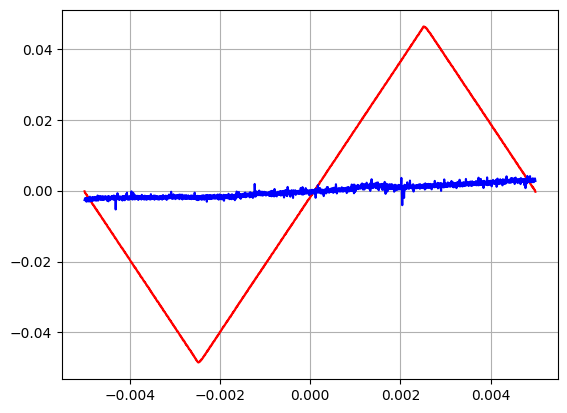

In [154]:
fig, ax = plt.subplots()
# ax.plot([i for i,x in enumerate(data)], data,'r-')
ax.plot(times,data,'r-')
ax.plot(times2,data2,'b-')
plt.grid()